# Groupby

**The groupby method allows you to group rows of data together and call aggregate functions.**

## What is Groupby ?

> In case you don't have SQL experience, we'll explain what groupby does.
Simply put, Groupby **allows you to group together rows based off of a column and perform an aggregate function on them.** 


# **Let's consider the image below as an example :**
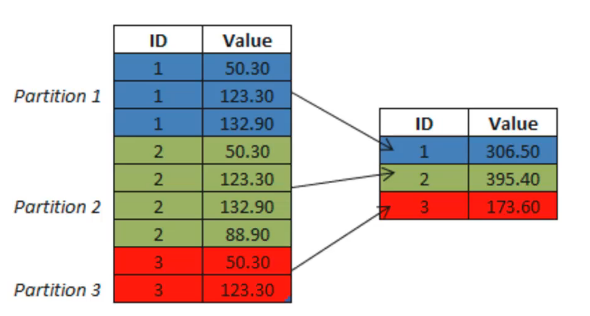
* In the image above we have 3 Partitions of ID's 1, 2 and 3.
* We can groupby the ID column and aggregate them using some sort of aggregate function.
* Aggregate function is sort of a fancy term for any function that takes in many values and splits out a single value. Other examples include : 
    1. Taking the sum of input values and outputting the result.
    2. Average
    3. Standard Deviation etc.
* **Choose a column to groupby >> Gather all those rows together >> Perform some sort of agg. function on it.**


# Groupby with Pandas

In [10]:
import numpy as np
import pandas as pd

In [11]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [12]:
# For having gridlines

In [13]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [14]:
df = pd.DataFrame(data) # Metadata with company column with 3 company codes, Person col, Sales column

In [15]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [16]:
# We can now use groupby method to group rows together based off of a column name.
df.groupby('Company') # Points to where this is stored in memory.
# DataFrame_name.groupby('col_name')

In [17]:
byComp = df.groupby('Company') # Store the memory location in a variable.

In [18]:
# Calling some sort of aggregate function on the variable holding the memory location.
# To get mean by company
byComp.mean() # Looks at column and gives us average sales by the company.
# It can't perform mean on column Person as it is of string type, and mean wouldn't make sense.

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [19]:
byComp.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [20]:
byComp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [21]:
byComp.sum().loc['FB'] # As we get a DataFrame in return, so calling FB sum of sales.

Sales    593
Name: FB, dtype: int64

In [23]:
# Calling in one line
df.groupby('Company').sum().loc['GOOG']

Sales    320
Name: GOOG, dtype: int64

**Other useful aggregate functions :**
* count : Counts the number of instances per column.
* max : Returns the maximum number from number column, and alphabetically max value from string type column.
* min : Returns the minimum number from number column, and alphabetically min value from string type column.

In [27]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [28]:
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [30]:
df.groupby('Company').min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


**A lot of times we can use groupby with the describe method and it gives us useful info in one go.**

In [39]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [40]:
df.groupby('Company').describe().transpose()
#Call Single Companies using following
# df.groupby('Company').describe().transpose()['FB']

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

**You just call the DataFrame ==> Specify .groupby ==> ('Column_you_want_to_group_by').aggregate_method() making the entire syntax for using Groupby = DataFrame.groupby('Column_you_want_to_group_by').aggregate_method()**